# Imports

In [2]:
# If Shapley Value package shap is not installed, run this code to install it
# conda install -c conda-forge shap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn import metrics
import statsmodels.api as sm
import shap

%matplotlib inline

# Get Cleaned Train Data

In [2]:
df_cl = pd.read_csv("../datasets/train_cleaned.csv")

# Modeling

### Define X & y

In [3]:
var_list = ['MS SubClass_20',
            'MS SubClass_30',
            'MS SubClass_40',
            'MS SubClass_45',
            'MS SubClass_50',
            'MS SubClass_60',
            'MS SubClass_70',
            'MS SubClass_75',
            'MS SubClass_80',
            'MS SubClass_85',
            'MS SubClass_90',
            'MS SubClass_160',
            'MS SubClass_180',
            'MS SubClass_190',
            'MS Zoning_FV',
            'MS Zoning_I (all)',
            'MS Zoning_RH',
            'MS Zoning_RL',
            'MS Zoning_RM',
            'Lot Frontage',
            'Lot Area',
            'Lot Area > 30k',
            'Lot Shape_IR2',
            'Lot Shape_IR3',
            'Lot Shape_Reg',
            'IsNotLevelContour',
            'Lot Config_CulDSac',
            'Lot Config_FR2',
            'Lot Config_FR3',
            'Lot Config_Inside',
            'Land Slope_Mod',
            'Land Slope_Sev',
            'Neighborhood_Blueste',
            'Neighborhood_BrDale',
            'Neighborhood_BrkSide',
            'Neighborhood_ClearCr',
            'Neighborhood_CollgCr',
            'Neighborhood_Crawfor',
            'Neighborhood_Edwards',
            'Neighborhood_Gilbert',
            'Neighborhood_Greens',
            'Neighborhood_IDOTRR',
            'Neighborhood_MeadowV',
            'Neighborhood_Mitchel',
            'Neighborhood_NAmes',
            'Neighborhood_NPkVill',
            'Neighborhood_NWAmes',
            'Neighborhood_NoRidge',
            'Neighborhood_NridgHt',
            'Neighborhood_OldTown',
            'Neighborhood_SWISU',
            'Neighborhood_Sawyer',
            'Neighborhood_SawyerW',
            'Neighborhood_Somerst',
            'Neighborhood_StoneBr',
            'Neighborhood_Timber',
            'Neighborhood_Veenker',
            'IsNotNormalCondition1',
            'IsNotNormalCondition2',
            'Bldg Type_2fmCon',
            'Bldg Type_Duplex',
            'Bldg Type_Twnhs',
            'Bldg Type_TwnhsE',
            'House Style_1.5Unf',
            'House Style_1Story',
            'House Style_2.5Fin',
            'House Style_2.5Unf',
            'House Style_2Story',
            'House Style_SFoyer',
            'House Style_SLvl',
            'Overall Qual',
            'Overall Cond',
            'Age At Sale',
            'Years Since Remod/Add',
            'IsHipRoof',
            'Exterior 1st_BrkFace',
            'Exterior 1st_CemntBd',
            'Exterior 1st_HdBoard',
            'Exterior 1st_MetalSd',
            'Exterior 1st_Plywood',
            'Exterior 1st_Stucco',
            'Exterior 1st_VinylSd',
            'Exterior 1st_Wd Sdng',
            'Exterior 1st_WdShing',
            'Exterior 1st_OtherExt',
            'DiffExt2',
            'Mas Vnr Type_BrkFace',
            'Mas Vnr Type_Stone',
            'Mas Vnr Type_None',
            'Exter Qual_Fa',
            'Exter Qual_Gd',
            'Exter Qual_TA',
            'Exter Cond_Fa',
            'Exter Cond_Gd',
            'Exter Cond_Po',
            'Exter Cond_TA',
            'Foundation_CBlock',
            'Foundation_PConc',
            'Foundation_Slab',
            'Foundation_Stone',
            'Foundation_Wood',
            'Bsmt Qual_Gd',
            'Bsmt Qual_TA',
            'Bsmt Qual_FairPoor',
            'Bsmt Qual_No Basement',
            'HasAvGdBsmtExposure',
            'BsmtFin Type 1_BLQ',
            'BsmtFin Type 1_GLQ',
            'BsmtFin Type 1_LwQ',
            'BsmtFin Type 1_Rec',
            'BsmtFin Type 1_Unf',
            'BsmtFin Type 1_No Basement',
            'BsmtFin SF 1',
            'Bsmt Unf SF',
            'Total Bsmt SF',
            'Heating QC_Fa',
            'Heating QC_Gd',
            'Heating QC_TA',
            'Central Air',
            'NotStdElectrical',
            '1st Flr SF',
            '1st Flr SF > 3000',
            '2nd Flr SF',
            'Low Qual Fin SF',
            'Gr Liv Area',
            'HasBsmtFullBath',
            'HasBsmtHalfBath',
            'Full Bath',
            'Half Bath',
            'Bedroom AbvGr',
            'Kitchen AbvGr',
            'Kitchen Qual_Gd',
            'Kitchen Qual_TA',
            'Kitchen Qual_Fa',
            'TotRms AbvGrd',
            'IsNotTypFunctional',
            'HasFireplace',
            'HasExGdFireplace',
            'Garage Type_Attchd',
            'Garage Type_Basment',
            'Garage Type_BuiltIn',
            'Garage Type_CarPort',
            'Garage Type_Detchd',
            'Garage Type_NoGarage',
            'Garage Blt After House',
            'Garage Finish_NoGarage',
            'Garage Finish_RFn',
            'Garage Finish_Unf',
            'Garage Cars',
            'Garage Area',
            'IsNotPavedDrive',
            'Wood Deck SF',
            'Open Porch SF',
            'Enclosed Porch',
            '3Ssn Porch',
            'Screen Porch',
            'Pool Area',
            'HasFence',
            'Misc Val',
            'Mo Sold',
            'Sale Type_CWD',
            'Sale Type_Con',
            'Sale Type_ConLD',
            'Sale Type_ConLI',
            'Sale Type_ConLw',
            'Sale Type_New',
            'Sale Type_Oth',
            'Sale Type_WD ',
            'Unique Old Houses',
            'Log 1st Flr SF',
            'Log Gr Liv Area',
            'Log Lot Area']
#            'Quality * Age', 
#            'Log Lot Area * Log 1st Flr SF',
#            'Garage Cars * Garage Area', 
#            'Log Gr Liv Area * Log Lot Area',
#            'Log Gr Liv Area * Full Bath', 
#            'Pool Area * Lot Lot Area',
#            'Age At Sale * Years Since Remod'

In [4]:
# nbhd_list = ['Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 
#              'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
#              'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 
#              'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
#              'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 
#              'Neighborhood_StoneBr']

In [5]:
var_list

['MS SubClass_20',
 'MS SubClass_30',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_50',
 'MS SubClass_60',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_90',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Lot Frontage',
 'Lot Area',
 'Lot Area > 30k',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'IsNotLevelContour',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Land Slope_Mod',
 'Land Slope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'IsNotNormalCondition1',
 'IsNotNormalCondition2',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl',
 'Overall Qual',
 'Overall Cond',
 'Age At Sale',
 'Years Since Remod/Add',
 'IsHipRoof',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exterior 1st_Wd Sdng',
 'Exterior 1st_WdShing',
 'Exterior 1st_OtherExt',
 'DiffExt2',
 'Mas Vnr Type_BrkFace',
 'Mas Vnr Type_Stone',
 'Mas Vnr Type_None',
 'Exter Qual_Fa',
 'Exter Qual_Gd',
 'Exter Qual_TA',
 'Exter Cond_Fa',
 'Exter Cond_Gd',
 'Exter Cond_Po',
 'Exter Cond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Bsmt Qual_Gd',
 'Bsmt Qual_TA',
 'Bsmt Qual_FairPoor',
 'Bsmt Qual_No Basement',
 'HasAvGdBsmtExposure',
 'BsmtFin Type 1_BLQ',
 'BsmtFin Type 1_GLQ',
 'BsmtFin Type 1_LwQ',
 'BsmtFin Type 1_Rec',
 'BsmtFin Type 1_Unf',
 'BsmtFin Type 1_No Basement',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC_Fa',
 'Heating QC_Gd',
 'Heating QC_TA',
 'Central Air',
 'NotStdElectrical',
 '1st Flr SF',
 '1st Flr SF > 3000',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'HasBsmtFullBath',
 'HasBsmtHalfBath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual_Gd',
 'Kitchen Qual_TA',
 'Kitchen Qual_Fa',
 'TotRms AbvGrd',
 'IsNotTypFunctional',
 'HasFireplace',
 'HasExGdFireplace',
 'Garage Type_Attchd',
 'Garage Type_Basment',
 'Garage Type_BuiltIn',
 'Garage Type_CarPort',
 'Garage Type_Detchd',
 'Garage Type_NoGarage',
 'Garage Blt After House',
 'Garage Finish_NoGarage',
 'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Cars',
 'Garage Area',
 'IsNotPavedDrive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'HasFence',
 'Misc Val',
 'Mo Sold',
 'Sale Type_CWD',
 'Sale Type_Con',
 'Sale Type_ConLD',
 'Sale Type_ConLI',
 'Sale Type_ConLw',
 'Sale Type_New',
 'Sale Type_Oth',
 'Sale Type_WD ',
 'Unique Old Houses',
 'Log 1st Flr SF',
 'Log Gr Liv Area',
 'Log Lot Area']

In [6]:
#Define X and y
X = df_cl[var_list]
y = df_cl["Log Sale Price"]

### Create train test split on dataframe

In [7]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

### Run LASSO model


In [8]:
#First scale the data

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [9]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_model = lasso_cv.fit(Z_train, y_train);

In [10]:
# Here is the optimal value of alpha
lasso_model.alpha_

0.002009233002565048

In [11]:
print(f'Train score:', lasso_model.score(Z_train, y_train))
print(f'Test score:', lasso_model.score(Z_test, y_test))

Train score: 0.92578212576411
Test score: 0.8999260508704691


In [12]:
# Display model coefficients
lasso_model.coef_

array([ 1.41271299e-03,  0.00000000e+00, -1.27881531e-03,  2.79574632e-03,
       -0.00000000e+00, -0.00000000e+00,  1.80397136e-03,  0.00000000e+00,
       -0.00000000e+00,  4.91194247e-04, -2.41293839e-05, -3.46563037e-03,
        0.00000000e+00, -0.00000000e+00,  7.00224002e-03,  0.00000000e+00,
        0.00000000e+00,  2.51730008e-03,  0.00000000e+00, -1.33100431e-03,
       -0.00000000e+00, -3.95082650e-03,  0.00000000e+00, -1.00791104e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.78142211e-03,
       -3.89517593e-03,  1.39763378e-04,  2.39767998e-03,  1.61073839e-03,
        0.00000000e+00, -0.00000000e+00,  6.72623627e-03,  4.08787979e-03,
        0.00000000e+00,  1.69547080e-02, -1.38903622e-02, -5.46316069e-05,
        0.00000000e+00, -1.31539789e-02, -5.86014090e-03, -0.00000000e+00,
       -0.00000000e+00,  2.07624358e-03, -1.83781309e-03,  1.28299242e-02,
        2.02616292e-02, -7.24308402e-03, -0.00000000e+00, -3.56134961e-04,
       -3.44015220e-03,  

In [13]:
#Compute predictions on test data
preds_l = lasso_model.predict(Z_test)

In [14]:
#Transform predictions from log scale
exp_preds_l = np.exp(preds_l)

In [15]:
exp_preds_l.mean()

182185.68838142007

In [16]:
#Compute residuals
residuals_l = np.exp(y_test) - exp_preds_l

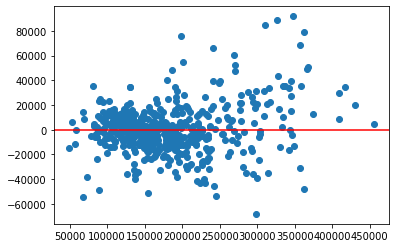

In [17]:
plt.scatter(exp_preds_l, residuals_l)
plt.axhline(0, color='r');

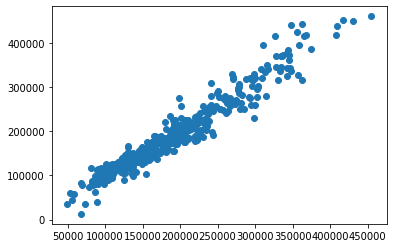

In [18]:
plt.scatter(exp_preds_l, np.exp(y_test))

In [19]:
##### Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(np.exp(y_test), exp_preds_l))

20072.632724986677

## Use Shapley Values to help translate model results

In [ ]:
# See https://github.com/slundberg/shap for more info on this package
# We used this a lot in driver analysis at my former company, so I thought it might be helpful here
# print the JS visualization code to the notebook
shap.initjs()

In [22]:
explainer = shap.LinearExplainer(lasso_model, Z_train, feature_purturbation="interventional")
shap_values = explainer.shap_values(Z_train)

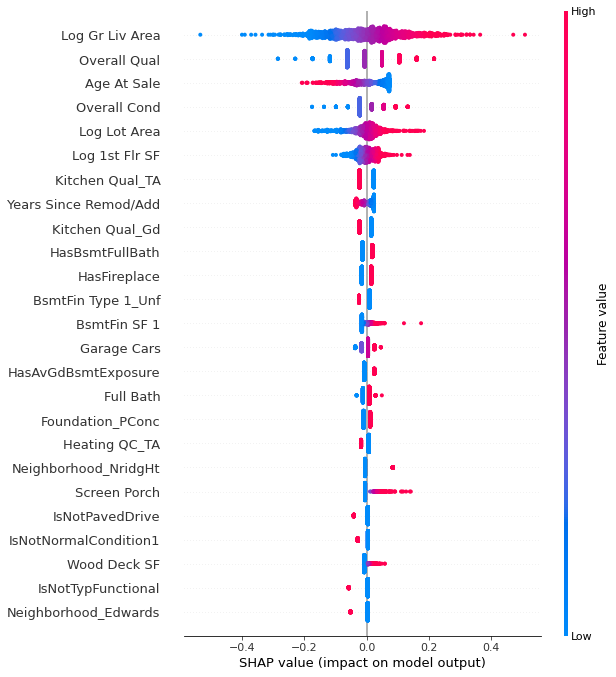

In [23]:
shap.summary_plot(shap_values, Z_train, feature_names=var_list, max_display=25)

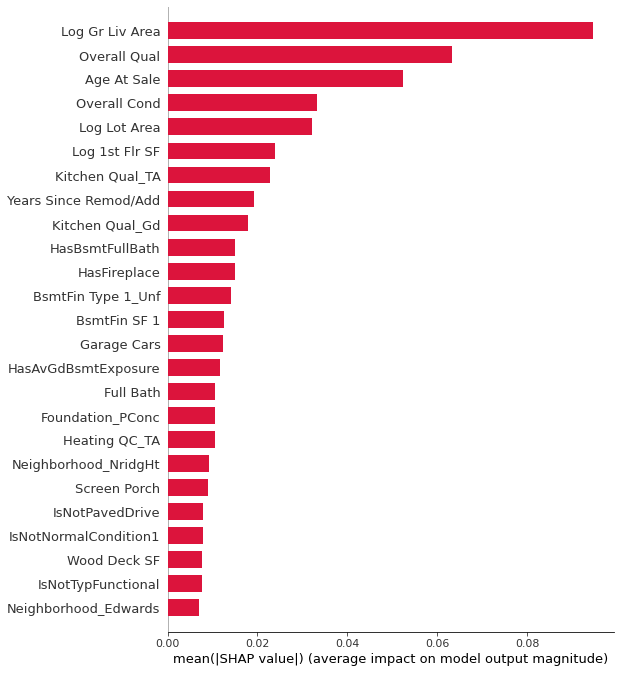

In [24]:
shap.summary_plot(shap_values, Z_train, max_display=25, plot_type='bar', color='crimson', feature_names=var_list)

## Score External Test Data

In [26]:
#Get cleaned test data
df_test = pd.read_csv("../datasets/test_cleaned.csv")
df_test.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  2658  902301120     69.000000      9142             6             8   
1  2718  905108090     68.915097      9662             5             4   
2  2414  528218130     58.000000     17104             7             5   
3  1989  902207150     60.000000      8520             5             6   
4   625  535105100     68.271963      9500             6             5   

   Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  ...  \
0        1910            1950             0         1020  ...   
1        1977            1977             0         1967  ...   
2        2006            2006           554          100  ...   
3        1923            2006             0          968  ...   
4        1963            1963           609          785  ...   

   Log Lot Area * Log 1st Flr SF  Garage Cars * Garage Area  \
0                      62.122870                        440   
1                      69.592880                       1160   
2                      63.339196                        852   
3                      62.222030                        960   
4                      66.310883                       1028   

   Log Gr Liv Area * Log Lot Area  Log Gr Liv Area * Full Bath  \
0                       68.990654                    15.128477   
1                       69.592880                    15.168530   
2                       71.256427                    14.621100   
3                       62.222030                     6.875232   
4                       66.310883                     7.239933   

   Pool Area * Lot Lot Area  Age At Sale * Years Since Remod  \
0                       0.0                             5376   
1                       0.0                              841   
2                       0.0                                0   
3                       0.0                               84   
4                       0.0                             2116   

   Log Gr Liv Area ^ 2  Log Gr Liv Area ^ 3  Quality ^ 2  Quality ^ 3  
0            57.217704           432.808356           36          216  
1            57.521073           436.255049           25          125  
2            53.444144           390.706093           49          343  
3            47.268816           324.984082           25          125  
4            52.416624           379.492824           36          216  

[5 rows x 196 columns]

In [27]:
#Define X variables for test data
X_t = df_test[var_list]

In [28]:
# Run variables through standard scaler
Z_test_t = sc.fit_transform(X_t)

In [29]:
# Compute predictions on test data
preds_t = lasso_model.predict(Z_test_t)

In [30]:
# preds_t

In [31]:
# Transform predictions from log scale
exp_preds_t = np.exp(preds_t)

In [32]:
exp_preds_t.mean()

179094.7835906881

In [33]:
# Create SalePrice variable for test data file for kaggle submission
df_test["SalePrice"] = exp_preds_t

In [34]:
df_test.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  2658  902301120     69.000000      9142             6             8   
1  2718  905108090     68.915097      9662             5             4   
2  2414  528218130     58.000000     17104             7             5   
3  1989  902207150     60.000000      8520             5             6   
4   625  535105100     68.271963      9500             6             5   

   Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  ...  \
0        1910            1950             0         1020  ...   
1        1977            1977             0         1967  ...   
2        2006            2006           554          100  ...   
3        1923            2006             0          968  ...   
4        1963            1963           609          785  ...   

   Garage Cars * Garage Area  Log Gr Liv Area * Log Lot Area  \
0                        440                       68.990654   
1                       1160                       69.592880   
2                        852                       71.256427   
3                        960                       62.222030   
4                       1028                       66.310883   

   Log Gr Liv Area * Full Bath  Pool Area * Lot Lot Area  \
0                    15.128477                       0.0   
1                    15.168530                       0.0   
2                    14.621100                       0.0   
3                     6.875232                       0.0   
4                     7.239933                       0.0   

   Age At Sale * Years Since Remod  Log Gr Liv Area ^ 2  Log Gr Liv Area ^ 3  \
0                             5376            57.217704           432.808356   
1                              841            57.521073           436.255049   
2                                0            53.444144           390.706093   
3                               84            47.268816           324.984082   
4                             2116            52.416624           379.492824   

   Quality ^ 2  Quality ^ 3      SalePrice  
0           36          216  135405.762854  
1           25          125  154646.760386  
2           49          343  228015.252439  
3           25          125  105976.081506  
4           36          216  172695.152856  

[5 rows x 197 columns]

In [39]:
# Save file to csv for kaggle submission
df_test[["Id", "SalePrice"]].to_csv("../datasets/submission.csv", index=False)